## Import some things

In [1]:
from Liver_Generator import Data_Generator, os, plot_scroll_Image

Using TensorFlow backend.
c:\users\bmanderson\appdata\local\programs\python\python36\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [2]:
%matplotlib notebook

In [8]:
data_path = os.path.join('..','Data','Numpy_Arrays')
train_path = os.path.join(data_path,'Train')
validation_path = os.path.join(data_path,'Validation')

In [9]:
args = {'batch_size':10,'mean_val':81,'std_val':31,'on_vgg':True}
train_generator = Data_Generator(train_path, shuffle=True, **args) # mean_val=81,std_val=30
test_generator = Data_Generator(validation_path, shuffle=True, **args) # mean_val=81,std_val=30

## Normalize images about the mask to be mean 0, std 1

In [ ]:
#train_generator.get_mean_std_val() # This will calculate the mean and std for you and set it in the model
print(train_generator.mean_val)

In [10]:
x,y = train_generator.__getitem__(0)

MED_LYMPH_017_42.nii.gz
MED_LYMPH_030_38.nii.gz
MED_LYMPH_024_17.nii.gz
MED_LYMPH_063_77.nii.gz
MED_LYMPH_069_109.nii.gz
ABD_LYMPH_016_154.nii.gz
ABD_LYMPH_016_65.nii.gz
ABD_LYMPH_019_164.nii.gz
MED_LYMPH_030_128.nii.gz
ABD_LYMPH_016_132.nii.gz


<IPython.core.display.Javascript object>


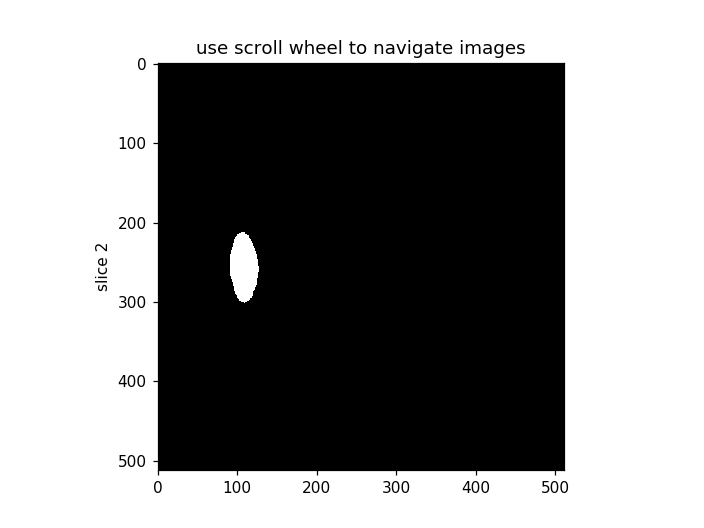

(<Figure size 640x480 with 1 Axes>,
 <Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT.IndexTracker at 0x1aa4ae008d0>)

In [12]:
plot_scroll_Image(x[...,0])

### Alright, lets make our model!

In [ ]:
from Easy_VGG16_UNet.Keras_Fine_Tune_VGG_16_Liver import VGG_16
from Visualizing_Model.Visualing_Model import visualization_model_class

In [ ]:
network = {'Layer_0': {'Encoding': [64, 64], 'Decoding': [64, 32]},
           'Layer_1': {'Encoding': [128, 128], 'Decoding': [128]},
           'Layer_2': {'Encoding': [256, 256, 256], 'Decoding': [256]},
           'Layer_3': {'Encoding': [512, 512, 512], 'Decoding': [512]},
           'Layer_4': {'Encoding': [512, 512, 512]}}
VGG_model = VGG_16(network=network, activation='relu',filter_size=(3,3))
VGG_model.make_model()
VGG_model.load_weights()
new_model = VGG_model.created_model

In [ ]:
Visualizing_Class = visualization_model_class(model=new_model, desired_layer_names=['block1_conv1'])

In [ ]:
new_model.layers[1].name

In [ ]:
Visualizing_Class.predict_on_tensor(x)

In [ ]:
Visualizing_Class.plot_activations()

In [ ]:
import numpy as np

In [ ]:
new_x = np.tile(x,1)
new_x.shape

In [ ]:
plot_scroll_Image(new_x[...,2])